# 相关模块导入

In [90]:
from IPython.core.interactiveshell import InteractiveShell

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

# 数据读取与预处理

In [61]:
raw_data = pd.read_csv('data/train.csv')
raw_data.head()
raw_data.info()
raw_data.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 分布偏度

<AxesSubplot:>

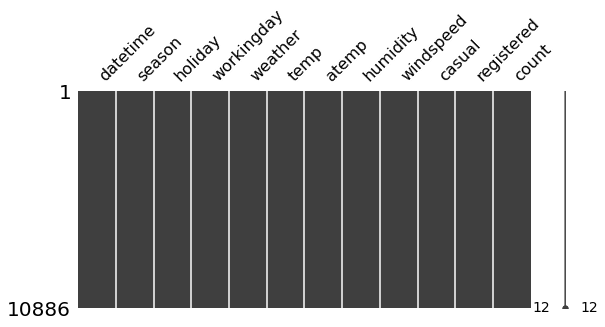

In [62]:
msno.matrix(raw_data, figsize=(9, 4))

## 时间处理

In [63]:
raw_data['month'] = pd.DatetimeIndex(raw_data.datetime).month
raw_data['day'] = pd.DatetimeIndex(raw_data.datetime).dayofweek
raw_data['hour'] = pd.DatetimeIndex(raw_data.datetime).hour

In [64]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4


## 去除 casual 和 registered 列（测试集不存在）

In [65]:
raw_data.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

In [66]:
raw_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,5,4


## 划分特征与标签

In [67]:
raw_data_features = raw_data.drop(['count'], axis=1).values
raw_data_target = raw_data['count'].values
print(raw_data_features.shape)
print(raw_data_target.shape)

(10886, 11)
(10886,)


## 离群值分析

<AxesSubplot:ylabel='count'>

<AxesSubplot:xlabel='season', ylabel='count'>

<AxesSubplot:xlabel='hour', ylabel='count'>

<AxesSubplot:xlabel='workingday', ylabel='count'>

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Box Plot On Count')]

[Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Season')]

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Hour Of The Day')]

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

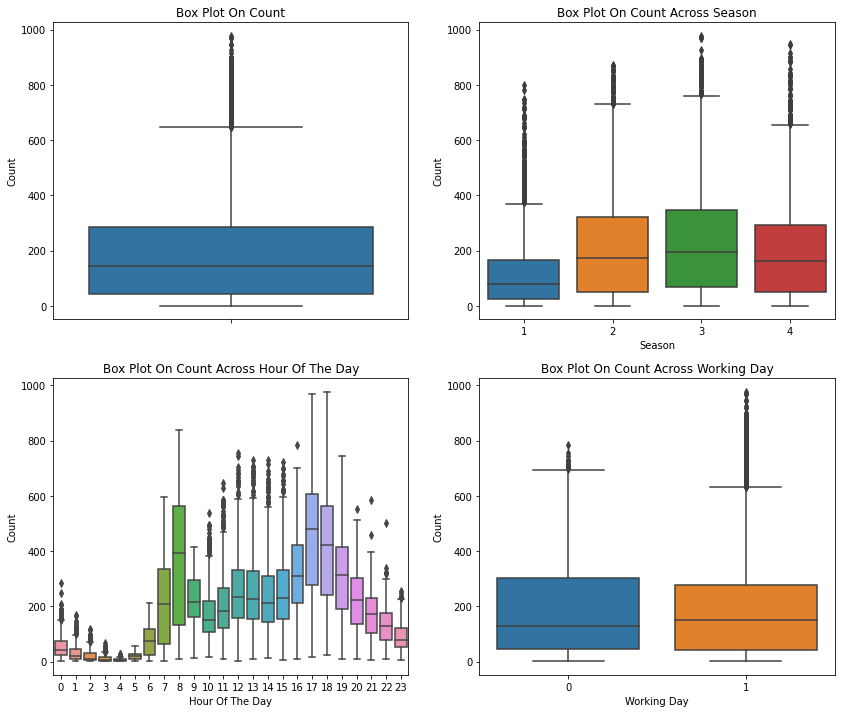

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(14, 12)
sns.boxplot(data=raw_data, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=raw_data, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=raw_data, y="count", x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data=raw_data, y="count", x="workingday", orient="v", ax=axes[1][1])

axes[0][0].set(ylabel='Count', title="Box Plot On Count")
# 1 = spring, 2 = summer, 3 = fall, 4 = winter
axes[0][1].set(xlabel='Season', ylabel='Count', title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count', title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count', title="Box Plot On Count Across Working Day")

## 相关性分析

<AxesSubplot:>

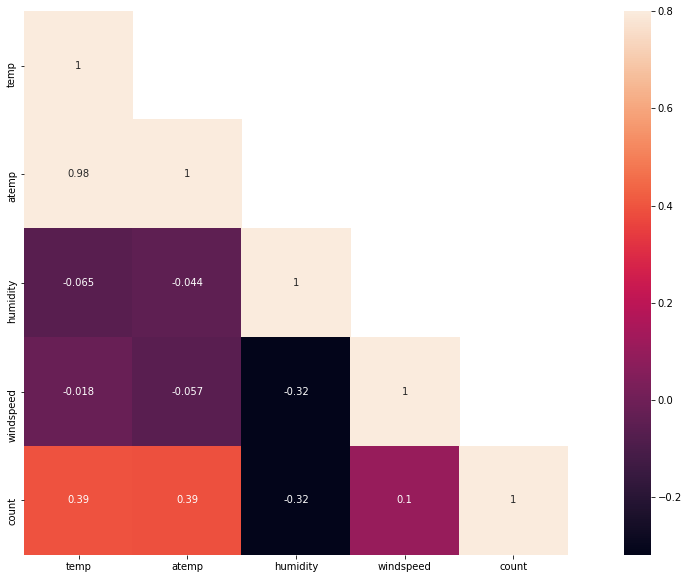

In [82]:
corr = raw_data[["temp", "atemp", "humidity", "windspeed", "count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

fig, ax= plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr, mask=mask, vmax=.8, square=True, annot=True)

<AxesSubplot:xlabel='temp', ylabel='count'>

<AxesSubplot:xlabel='windspeed', ylabel='count'>

<AxesSubplot:xlabel='humidity', ylabel='count'>

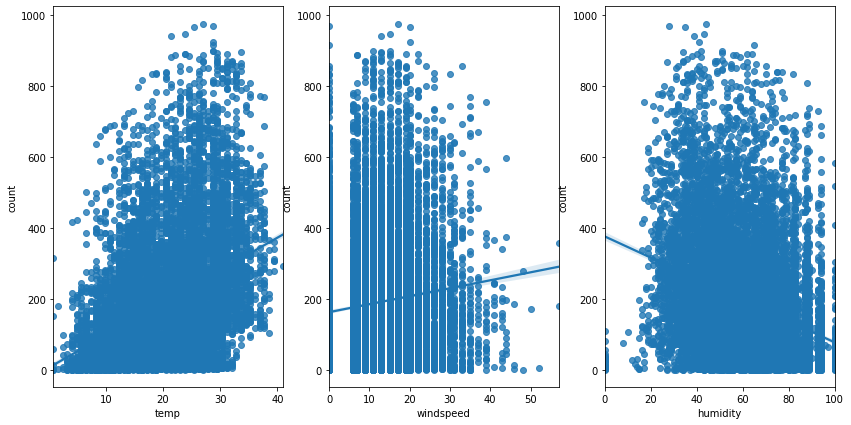

In [89]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(14, 7)

sns.regplot(x="temp", y="count", data=raw_data, ax=ax1)
sns.regplot(x="windspeed", y="count", data=raw_data, ax=ax2)
sns.regplot(x="humidity", y="count", data=raw_data, ax=ax3)

## 数据可视化

S:\GDUT\Sophomore\SophomoreWinterVacationStudy\BikeSharingDemand\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

S:\GDUT\Sophomore\SophomoreWinterVacationStudy\BikeSharingDemand\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (169.82942673231383, 191.5741319125482, 0.9372682766213171))

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87626461, 6.87832647,
         6.88550967])),
 (1.3647396459244168, 4.591363690454027, 0.9611793780126959))

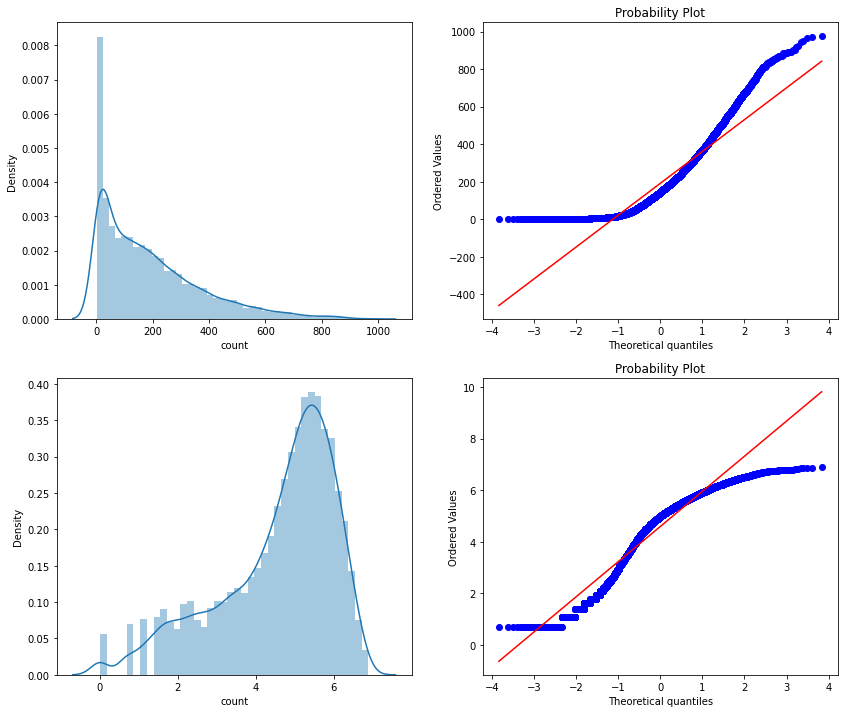

In [99]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(14, 12)

sns.distplot(raw_data["count"], ax=axes[0][0])
sns.distplot(np.log(raw_data["count"]), ax=axes[1][0])
# 分位数图示法（Quantile Quantile Plot，简称 Q-Q 图）
stats.probplot(raw_data["count"], dist='norm', fit=True, plot=axes[0][1])
stats.probplot(np.log1p(raw_data["count"]), dist='norm', fit=True, plot=axes[1][1])